##Loading Libraries and data##

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

print('Finsihed loading libraries')

Finsihed loading libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/Machine_learning/diabetes_prediction_dataset[1].csv"
data = pd.read_csv(file_path)

##Exploration##

### <span style='color:#FF7D13; '>|</span> **Feature description**
* `gender` -> Gender refers to the biological sex of the individual, which can have an impact on their susceptibility to diabetes. There are three categories in it male ,female and other.

* `age` -> Age is an important factor as diabetes is more commonly diagnosed in older adults.Age ranges from 0-80 in our dataset.

* `hypertension` -> Hypertension is a medical condition in which the blood pressure in the arteries is persistently elevated. It has values a 0 or 1 where 0 indicates they don’t have hypertension and for 1 it means they have hypertension.

* `heart_disease` -> Heart disease is another medical condition that is associated with an increased risk of developing diabetes. It has values a 0 or 1 where 0 indicates they don’t have heart disease and for 1 it means they have heart disease.

* `smoking_history` -> Smoking history is also considered a risk factor for diabetes and can exacerbate the complications associated with diabetes.In our dataset we have 5 categories i.e not current,former,No Info,current,never and ever.

* `bmi` -> BMI (Body Mass Index) is a measure of body fat based on weight and height. Higher BMI values are linked to a higher risk of diabetes. The range of BMI in the dataset is from 10.16 to 71.55. BMI less than 18.5 is underweight, 18.5-24.9 is normal, 25-29.9 is overweight, and 30 or more is obese.

* `HbA1c_level` -> HbA1c (Hemoglobin A1c) level is a measure of a person's average blood sugar level over the past 2-3 months. Higher levels indicate a greater risk of developing diabetes. Mostly more than 6.5% of HbA1c Level indicates diabetes.

* `blood_glucose_level` -> Blood glucose level refers to the amount of glucose in the bloodstream at a given time. High blood glucose levels are a key indicator of diabetes.

* **`diabetes`** -> Diabetes is the target variable being predicted, with values of 1 indicating the presence of diabetes and 0 indicating the absence of diabetes.

In [ ]:
#print out index
print(data.index)

#data types
print(data.dtypes)

RangeIndex(start=0, stop=100000, step=1)
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [ ]:
#get data summary stats
summary_stats = data.describe()
print(summary_stats)

                 age  hypertension  heart_disease            bmi  \
count  100000.000000  100000.00000  100000.000000  100000.000000   
mean       41.885856       0.07485       0.039420      27.320767   
std        22.516840       0.26315       0.194593       6.636783   
min         0.080000       0.00000       0.000000      10.010000   
25%        24.000000       0.00000       0.000000      23.630000   
50%        43.000000       0.00000       0.000000      27.320000   
75%        60.000000       0.00000       0.000000      29.580000   
max        80.000000       1.00000       1.000000      95.690000   

         HbA1c_level  blood_glucose_level       diabetes  
count  100000.000000        100000.000000  100000.000000  
mean        5.527507           138.058060       0.085000  
std         1.070672            40.708136       0.278883  
min         3.500000            80.000000       0.000000  
25%         4.800000           100.000000       0.000000  
50%         5.800000           14

In [ ]:
#check for any mssing values, NA, weird symbols
missing_values = data.isnull().sum()
print("missing values:\n", missing_values)
weird_symbols = data.select_dtypes(include='object').apply(lambda x: x.str.contains('[^A-Za-z0-9\s]', regex=True).any())
print("weird symbols:\n", weird_symbols)

missing values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64
weird symbols:
 gender             False
smoking_history    False
dtype: bool


##Visualization##

<ipython-input-61-7d9906efda9c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


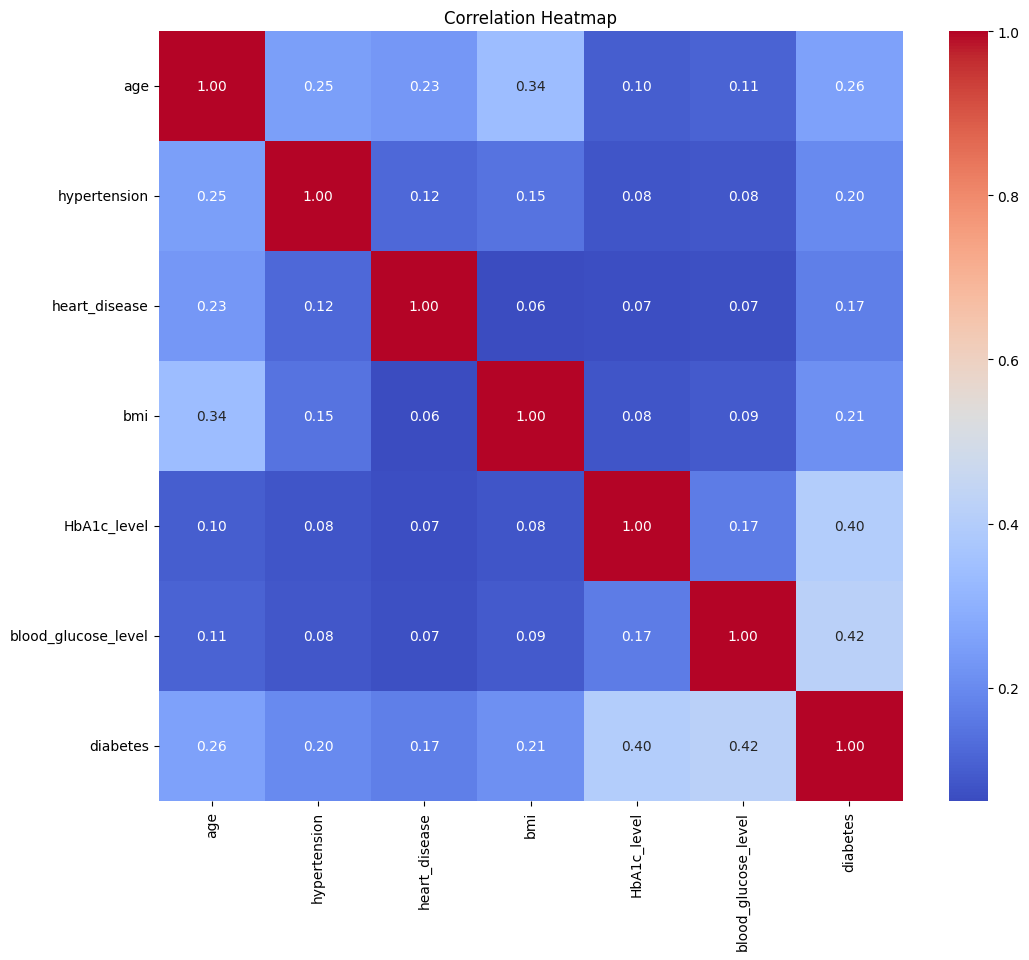

In [ ]:
#check correlation using heatmap
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

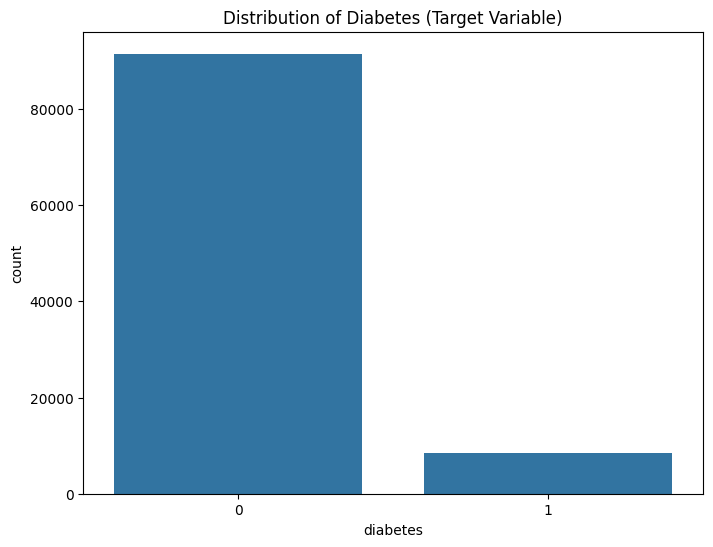

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='diabetes', data=data)
plt.title('Distribution of Diabetes (Target Variable)')
plt.show()

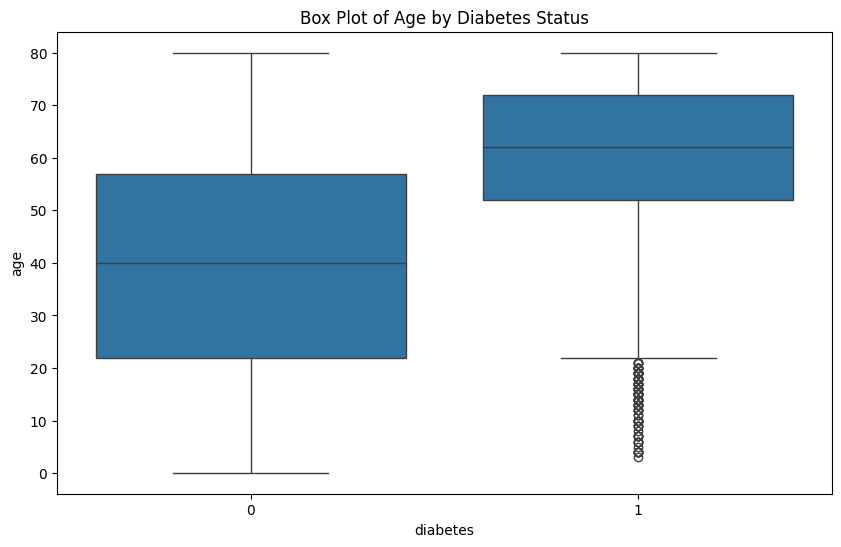

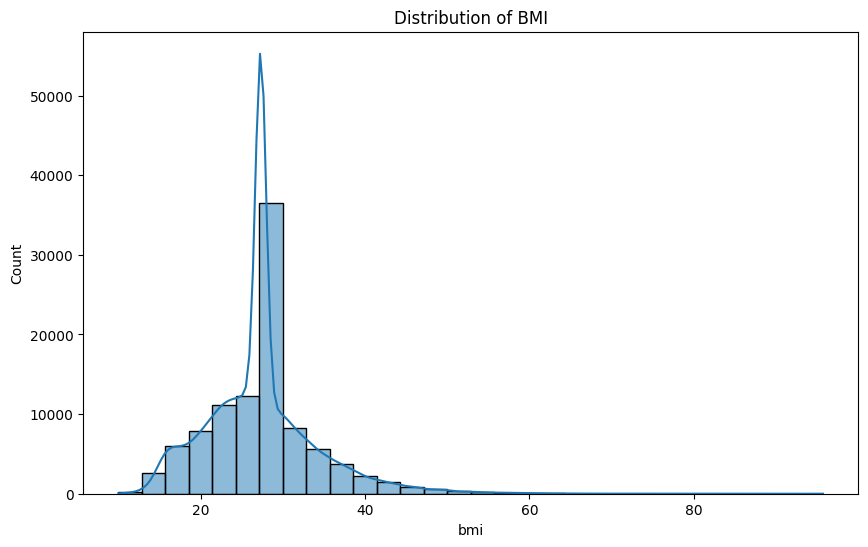

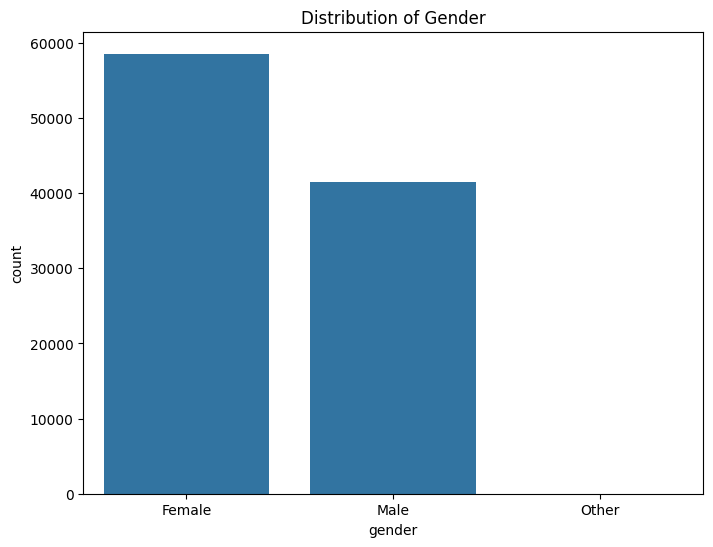

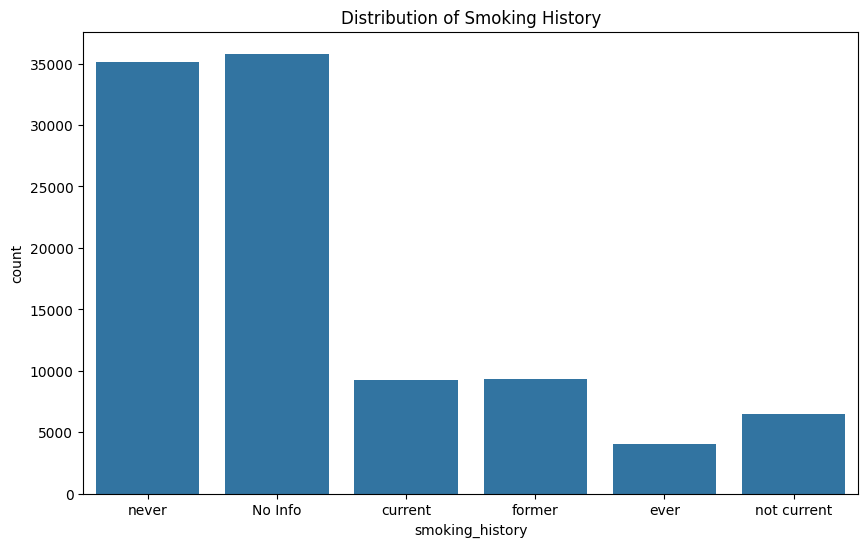

In [ ]:
# Box plot for 'age' distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='age', data=data)
plt.title('Box Plot of Age by Diabetes Status')
plt.show()

# Histogram for 'bmi' distribution
plt.figure(figsize=(10, 6))
sns.histplot(x='bmi', data=data, bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

# Count plot for 'gender' distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.show()

# Count plot for 'smoking_history' distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='smoking_history', data=data)
plt.title('Distribution of Smoking History')
plt.show()

##Spliting and Encoding##

In [ ]:
# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])

In [ ]:
# Split the data into training and testing sets
X = data.drop('diabetes', axis=1)
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Standardize the features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert target variables to binary
y_train_binary = (y_train > 0.5).astype(int)
y_test_binary = (y_test > 0.5).astype(int)

In [ ]:

# Standardize numeric features
numeric_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train_numeric = X_train[numeric_cols]
X_test_numeric = X_test[numeric_cols]
X_train_scaled_numeric = scaler.fit_transform(X_train_numeric)
X_test_scaled_numeric = scaler.transform(X_test_numeric)

# Replace the scaled numeric values back into the original DataFrame
X_train[numeric_cols] = X_train_scaled_numeric
X_test[numeric_cols] = X_test_scaled_numeric


##Ridge Modeling##

In [ ]:
from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
ridge_model = RidgeClassifier(alpha=1.0)
ridge_model.fit(X_train, y_train)

RidgeClassifier()

In [ ]:
# Predictions
y_pred_ridge = ridge_model.predict(X_test)
y_pred_ridge_binary = (y_pred_ridge > 0.5).astype(int)

In [ ]:
# Evaluation metrics
accuracy_ridge = accuracy_score(y_test, y_pred_ridge_binary)
conf_matrix_ridge = confusion_matrix(y_test, y_pred_ridge_binary)

print("Ridge Model Accuracy:", accuracy_ridge)
print("Confusion Matrix (Ridge):\n", conf_matrix_ridge)

Ridge Model Accuracy: 0.93855
Confusion Matrix (Ridge):
 [[18287     5]
 [ 1224   484]]


In [ ]:
# Define custom scoring function
custom_scorer = make_scorer(accuracy_score)

# Perform cross-validation on Ridge Classifier
ridge_model = RidgeClassifier(alpha=1.0)
ridge_cv_scores = cross_val_score(
    ridge_model, X_train, y_train_binary, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=custom_scorer)

# Print cross-validation scores
print("Ridge Cross-Validation Scores:", ridge_cv_scores)
print(f"Mean Ridge Cross-Validation Score: {ridge_cv_scores.mean()}")

# Generate classification report
ridge_classification_report = classification_report(y_test_binary, y_pred_ridge_binary)
print(f"Classification Report (Ridge):\n {ridge_classification_report}")

Ridge Cross-Validation Scores: [0.939875  0.939625  0.942125  0.939875  0.9399375]
Mean Ridge Cross-Validation Score: 0.9402874999999999
Classification Report (Ridge):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     18292
           1       0.99      0.28      0.44      1708

    accuracy                           0.94     20000
   macro avg       0.96      0.64      0.70     20000
weighted avg       0.94      0.94      0.92     20000



##Lasso Modeling##

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, accuracy_score

In [ ]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)


Lasso()

In [ ]:
# Predictions
y_pred_lasso = lasso_model.predict(X_test)
y_pred_lasso_binary = (y_pred_lasso > 0.5).astype(int)

In [ ]:
# Evaluation metrics
accuracy_lasso = accuracy_score(y_test, y_pred_lasso_binary)
conf_matrix_lasso = confusion_matrix(y_test, y_pred_lasso_binary)

print("Lasso Model Accuracy:", accuracy_lasso)
print("Confusion Matrix (Lasso):\n", conf_matrix_lasso)

Lasso Model Accuracy: 0.9146
Confusion Matrix (Lasso):
 [[18292     0]
 [ 1708     0]]


In [ ]:
# Define custom scoring function
custom_scorer = make_scorer(accuracy_score)

# Perform cross-validation on Ridge Classifier
lasso_model = RidgeClassifier(alpha=1.0)
lasso_cv_scores = cross_val_score(
    lasso_model, X_train, y_train_binary, cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42), scoring=custom_scorer)

# Print cross-validation scores
print("Lasso Cross-Validation Scores:", lasso_cv_scores)
print(f"Mean Lasso Cross-Validation Score: {lasso_cv_scores.mean()}")

# Generate classification report
lasso_classification_report = classification_report(y_test_binary, y_pred_lasso_binary)
print(f"Classification Report (Lasso):\n {lasso_classification_report}")

Lasso Cross-Validation Scores: [0.939875  0.939625  0.942125  0.939875  0.9399375]
Mean Lasso Cross-Validation Score: 0.9402874999999999
Classification Report (Lasso):
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     18292
           1       0.00      0.00      0.00      1708

    accuracy                           0.91     20000
   macro avg       0.46      0.50      0.48     20000
weighted avg       0.84      0.91      0.87     20000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
